# NumPy and Pandas DateTime Tutorial

**A basic primer to help with Time Series Analysis in Python**

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
sns.set()

## Datetimes in NumPy

NumPy's data type to manage datetimes is called `datetime64`. 

### Static arrays of `datetime64`

In [2]:
np.array(['2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14'], dtype='datetime64')

array(['2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14'],
      dtype='datetime64[D]')

Notice that the np.array has dtype='datetime64[D]'.  The 'D' standard for the minimum unit of days
Consider an alternative where we include hours.  You need to include the letter 'T' (for timestamp) in string pass to the numpy.array

In [3]:
np.array(['2019-07-11T06', '2019-07-12T12', '2019-07-13T01', '2019-07-14T17'], 
         dtype='datetime64')

array(['2019-07-11T06', '2019-07-12T12', '2019-07-13T01', '2019-07-14T17'],
      dtype='datetime64[h]')

That time the dtype='datetime64[h]' where 'h' stands for hours.  We can go further and try minutes.

In [4]:
np.array(['2019-07-11T00:13', '2019-07-12T00:15', '2019-07-13T00:15', '2019-07-14T00:05'], 
         dtype='datetime64')

array(['2019-07-11T00:13', '2019-07-12T00:15', '2019-07-13T00:15',
       '2019-07-14T00:05'], dtype='datetime64[m]')

And now try seconds

In [5]:
np.array(['2019-07-11T00:13:59', '2019-07-12T00:15:30', '2019-07-13T00:15:20', '2019-07-14T00:05:15'], 
         dtype='datetime64')

array(['2019-07-11T00:13:59', '2019-07-12T00:15:30',
       '2019-07-13T00:15:20', '2019-07-14T00:05:15'],
      dtype='datetime64[s]')

and miliseconds

In [6]:
np.array(['2019-07-11T00:13:59.100', '2019-07-12T00:15:30.189'], 
         dtype='datetime64')

array(['2019-07-11T00:13:59.100', '2019-07-12T00:15:30.189'],
      dtype='datetime64[ms]')

### Quick creation of date arrays using np.arange

`np.arange(start,stop,step)` (where stop is *exclusive*) is commonly used to produce an np.array of integers can be used to produce an array of evenly-spaced integers (particularly good for generating synthetic testing data).  

`np.arange` can also be used to generate a range of date time stamps.

In [7]:
np.arange('2019-07-01', '2019-07-31', step=7, dtype='datetime64[D]')

array(['2019-07-01', '2019-07-08', '2019-07-15', '2019-07-22',
       '2019-07-29'], dtype='datetime64[D]')

In [8]:
np.arange('2019-07-01', '2019-07-31', step=7, dtype='datetime64[m]')

array(['2019-07-01T00:00', '2019-07-01T00:07', '2019-07-01T00:14', ...,
       '2019-07-30T23:43', '2019-07-30T23:50', '2019-07-30T23:57'],
      dtype='datetime64[m]')

To get all values in between two dates then omit the step.  The below generates days between 1st and 10th August

In [9]:
np.arange('2019-07-01', '2019-07-10', dtype='datetime64[D]')

array(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
       '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
       '2019-07-09'], dtype='datetime64[D]')

## Date Time Index in Python

pandas `datetimeindex` builds on numpy datetime64 data type.  Pandas is definitely the easiest way to work with time series data in Python.  One of the reasons for this is that pandas can detect and handle different formats of date strings in input files.  Always watch out for problems with US -> UK dates and vice versa.

### Static creation

If you need to create some synthetic data for testing then you can use the `pandas.date_range` function.

In [10]:
index = pd.date_range('1/1/2019', periods=7, freq='D')
index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07'],
              dtype='datetime64[ns]', freq='D')

In [11]:
index = pd.date_range('1/1/2019', periods=7, freq='h')
index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

**Convert numpy array to datetime index**

In [12]:
arr_dates = np.array(['2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14'], dtype='datetime64')
index = pd.DatetimeIndex(arr_dates)
index

DatetimeIndex(['2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14'], dtype='datetime64[ns]', freq=None)

**Finding the min and max in a date time index**

In [13]:
index.min()

Timestamp('2019-07-11 00:00:00')

In [14]:
index.max()

Timestamp('2019-07-14 00:00:00')

## Importing data from a CSV file

First create a synthetic data set and save to csv

In [48]:
idx = pd.date_range('1/1/2018', periods=365*2, freq='D')
sales = np.random.poisson(30, size=365*2) # representing a count variable of sales og widgets with mean 30.

df = pd.DataFrame(sales, index=idx)
df.columns = ['sales']
df.index.name = 'date'
df.head()


,sales
date,
2018-01-01,26
2018-01-02,44
2018-01-03,17
2018-01-04,28
2018-01-05,33


In [49]:
df.to_csv('data/example_data1.csv') # save to file

Now read in the data and let pandas know that the index is a date field using the `parse_dates` argument.

In [50]:
df = pd.read_csv('data/example_data1.csv', index_col='date', parse_dates=True)

In [51]:
df.head()

,sales
date,
2018-01-01,26
2018-01-02,44
2018-01-03,17
2018-01-04,28
2018-01-05,33


In [52]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)

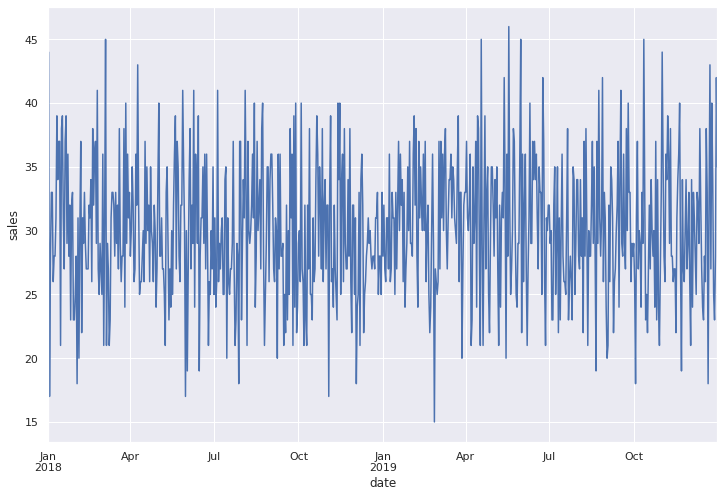

In [80]:
ax = df['sales'].plot(figsize=(12,8))
ax.set(xlabel='date', ylabel='sales');


**Limit to specific time ranges**

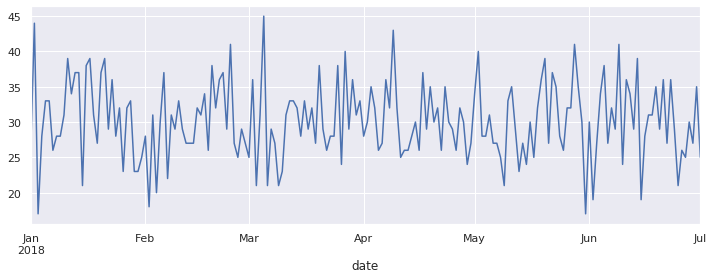

In [87]:
#e.g. first 6 months of 2018 - just use slicing
df['sales']['2018-01-01':'2018-07-01'].plot(figsize=(12,4));

### Easy ways to get access to specific types of dates

A simple way to do this is using the resample function.

In [54]:
df.resample(rule='A').mean() # year end frequency (Should be 30ish!)

,sales
date,
2018-12-31,29.830137
2019-12-31,30.435616


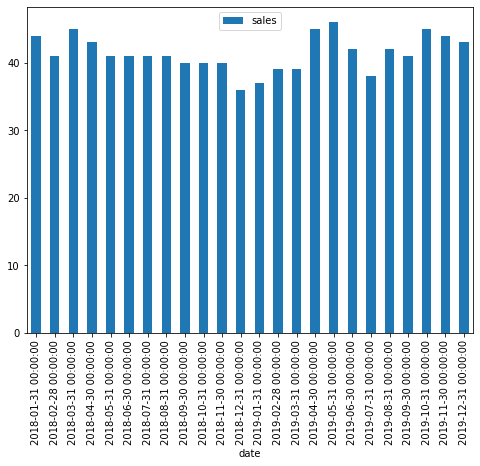

In [58]:
df.resample(rule='M').max().plot.bar(figsize=(8,6)) # month end maximum sales